# Probabilities and Information Theory

## Introduction

**Probability Theory** is the study of probability and its interpretations through a set of rigorous mathematical formalism and axioms. It defines probability in terms of a probability space and probability measures between $0$ and $1$. In conjunction with Linear Algebra, Probability is one of the bases for Machine Learning.

## Fundamentals of Probability

In this section, the fundamental concepts of probability theory, **Random Experiments**, **Sets**, **Indepedence**, **Conditional Probability**, and **Baye's Rule** are discussed.

### Random Experiments

The **Probability** of an **Event** , defined as the chance of its realization,  is encoded as a **Positive Real Numeral** between $0$ and $1$. Formally speaking, we first define a **Probability Space** composed of the three following components: a **Sample Space** $\Omega$ representing all possible outcomes of an experiment, a set of possible **Events**, as well as a **Probability Function** $P$ measuring the chance of each event to occur.

```{note}
Note the $\Omega$ contains itself but also the empty set of events $\varnothing$
```

The probability function is defined such as it always respect the following requirements:
- $P(\varnothing)=0$
- $P(\Omega)=1$
- $P(A \cup B)=P(A) + P(B)$ for two disjoint events $A$ and $B$
- $P(\overline{A}) = 1 - P(A)$ with $\overline{A}$ being the complement of the event $A$.

Let us illustrate those concepts by comparing three random experiments by **Monte Carlo Simulation** in conjunction with the **Theroy**.

#### Dice Rowling

Consider the following experiment where two independant and non-pipped six-sided dices are rolled, and we want to find the probability of the both dice being odd. The problem can be formalised as follow:
- $\Omega = \left \{ 1, \dots, 6  \right \}^2$
- $A = \left \{ (i, j) \; | \; i + j \; \text{is odd} \right \}$
- $P(B) = \frac{|B|}{|\Omega|}$ where $|.|$ denotes the number of element in the given set

The probability function is symmetric and can be resumed in the following table:

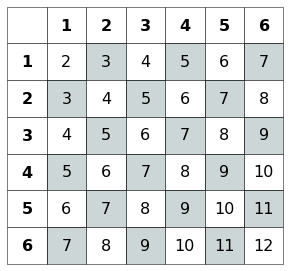

In [105]:
import matplotlib.pyplot as plt
plt.ion()
plt.style.use("fivethirtyeight")

omega = list(range(0, 6 + 1))
table = [[i + j for j in omega] for i in omega]
color = [[(1, 1, 1, 1) if e % 2 == 0 else (0, 0.2, 0.2, 0.2) for e in row] for row in table]
table = [[str(e) for e in row] for row in table]

bold = lambda x: f"$\\bf{x}$"

for i in range(0, 6 + 1):
    color[i][0] = color[0][i] = (1, 1, 1, 1)
    table[i][0] = table[0][i] = bold(i) if i > 0 else ""

cell_size = 0.3
size = cell_size * len(table)

fig = plt.figure(figsize=(size, size),  facecolor="white")
ax = fig.add_subplot(1, 1, 1)
ax.set_axis_off()

table = ax.table(cellText=table, cellColours=color, loc="center", cellLoc="center")
table.set_fontsize(16)
for pos, cell in table.get_celld().items():
    cell.set_height(cell_size)
    cell.set_width(cell_size)

fig.canvas.draw()

In [ ]:
from myst_nb import glue
glue("experiment_dice_fig", fig, display=False)

```{glue:figure} experiment_dice_fig
:align: center
:name: "experiment-dice-fig"

Table representig the probabilities for each value of the two dices. The odd outcomes'cell are filled in gray.
```

Using the defined probability function, we can now compute the probability of the event $A$ as beign:

$$
P(A) = \frac{18}{36} = 0.5
$$

In [118]:
from itertools import product

import numpy as np
np.random.seed(42)


N, FACES = 10**4, list(range(1, 6 + 1))
is_odd = lambda x: x % 2 != 0

th_p = np.sum([is_odd(i + j) for i, j in product(FACES, FACES)]) / (len(FACES) ** 2)
mc_p = np.sum([is_odd(np.random.choice(FACES) + np.random.choice(FACES)) for _ in range(N)]) / N

print(f"Theory                : P(A) = {th_p * 100:.2f}%")
print(f"Monte Carlo Estimation: P(A) = {mc_p * 100:.2f}%")

Theory                : P(A) = 50.00%
Monte Carlo Estimation: P(A) = 50.32%


#### Password Hacking
<!-- 
Monte Carlo Simulations W/ Theory
- Password Hacking
- Sampling w/ or wo/ Replacement
-->


### Sets
### Independence
### Conditional Probability
### Baye's Rule

## Probability Distributions
### Random Variables
### Moment Based Descriptors
### Discrete Distributions
### Continuous Distributions
### Joint Distributions

## Statistical Inference
### Random Sample
### Normal Sampling
### Central Limit Thorem
### Point Estimation
### Confidence Intervals
### Bayesian Statistics

## Hypothesis Testing
### Single Sample Hypothesis
### Two Sample Hypothesis
### Analysis of Variance
### Godness of Fit

## Information Theory
### Self-Information and Entropy
### Kullback-Leilber Divergence
### Jensen-Shanon Divergence
### Wasserstein Distance

## Applications
### Noise in Computer Graphics
### Probabilistic Dynamic Modeling
### Logistic Regression